In [7]:
import cv2
import os
import h5py
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata
import xarray as xr

# <------- FLATTEN NETCDF DATA ---------->

# Assuming your dataset is stored in a variable named "ds"
# Replace the path with your actual file path if you're loading the dataset from a file
ds = xr.open_dataset('C:/Users/DELL/Downloads/RF25_ind2021_rfp25.nc')

# Specify the variable name
variable_name = 'RAINFALL'

# Flatten the data
flattened_data = ds[variable_name].stack(z=('LATITUDE', 'LONGITUDE', 'TIME')).values

nan_indices = np.isnan(flattened_data)
print("Number of NaN values:", np.sum(nan_indices))

# Reshape the flattened data into a single row
one_row_data = np.ravel(flattened_data)

print(f"One-row data shape: {one_row_data.shape}")

# <------- SPATIAL INTERPOLATION FOR TIR1 DATA ---------->

# <------- TEST CONFIG ---------->

LOOKUP_DIRECTORY = 'C:/Users/DELL/Documents/Set 1/tir1_data'  # Put your .h5 files in this directory
FEATURE = "IMG_TIR1"  # Specify the feature you want to train on

MODEL_SAVE = f"model_{FEATURE.lower}.keras"
SCALER_SAVE = f"scaler_{FEATURE.lower}.pkl"

# <------- DATASET ---------->

# EXPERIMENTAL CODE - Please change accordingly
# For loading the file paths
data_directory = LOOKUP_DIRECTORY
file_paths = [os.path.join(data_directory, file) for file in os.listdir(data_directory) if file.endswith(".h5")]

# <------- SPATIAL DIMENSIONS ---------->

# Width and Height of the image, separately. i.e 800 means 800x800
original_width = 800
original_height = 800

# Desired size
target_width = 129
target_height = 135

# Resizing factor
resized_factor_width = target_width / original_width
resized_factor_height = target_height / original_height

# <------- SPATIAL INTERPOLATION ---------->

def bilinear_interpolation(x, y, z, target_shape):
    target_x, target_y = np.meshgrid(np.linspace(0, 1, target_shape[1]), np.linspace(0, 1, target_shape[0]))
    points = np.column_stack((x.flatten(), y.flatten()))
    values = z.flatten()
    interpolated_values = griddata(points, values, (target_x, target_y), method='linear')
    return interpolated_values

# <------- ITERATE THROUGH TIR1 DATA ---------->

# Assuming X is the variable containing TIR1 input data
# Replace this with the correct variable name if needed
X = np.random.rand(1, original_height, original_width)  # Replace with your actual TIR1 input data

resampled_data = []

for x_input in X:
    # Assuming each x_input is a TIR1 input
    original_x, original_y = np.meshgrid(np.linspace(0, 1, original_width), np.linspace(0, 1, original_height))
    interpolated_tir1 = bilinear_interpolation(original_x, original_y, x_input, (target_height, target_width))

    # Resize the interpolated TIR1 input to the desired size
    resized_tir1 = cv2.resize(interpolated_tir1, dsize=(target_width, target_height), interpolation=cv2.INTER_CUBIC)

    # Append the resampled data to the list
    resampled_data.append(resized_tir1)

# Convert the list to a NumPy array
resampled_data = np.array(resampled_data)

# Flatten the array to make all rows into one row
flattened_tir1_data = resampled_data.flatten()

# The flattened_tir1_data array now contains all TIR1 values in a single row
# Further processing or model training can be performed here
print(flattened_tir1_data.shape)

# Print the flattened NetCDF data
print("\nFlattened NetCDF Data:")
print(one_row_data)

# Print the flattened TIR1 data
print("\nFlattened TIR1 Data:")
print(flattened_tir1_data)
x=flattened_tir1_data[0 : 17414]
y=one_row_data[4823955 : 4841369]
y=np.nan_to_num(y,nan=0)
print(x)
for i in y:
    print(i)

print(x.shape)
print(y.shape)

Number of NaN values: 4544615
One-row data shape: (6356475,)
(17415,)

Flattened NetCDF Data:
[nan nan nan ... nan nan nan]

Flattened TIR1 Data:
[0.78304209 0.82217789 0.41311985 ... 0.49153524 0.94553543 0.6889915 ]
[0.78304209 0.82217789 0.41311985 ... 0.25766288 0.49153524 0.94553543]
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [8]:
#put random forest coding here
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming x_values and y_values are your 1D arrays
# Replace these with your actual data
x_values = x  # Replace with your actual x data
y_values = y  # Replace with your actual y data

# Reshape x_values to a 2D array (required for scikit-learn)
x_values = x_values.reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

# Create a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Now, you can use rf_model to make predictions on new data
for pred in y_pred:
    print(f" Predicted Values:",pred)
for test in y_test:
    print(f" Testing Values:",test)

Mean Squared Error: 4.589731307128338
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.04872731983661652
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Predicted Values: 0.0
 Pr

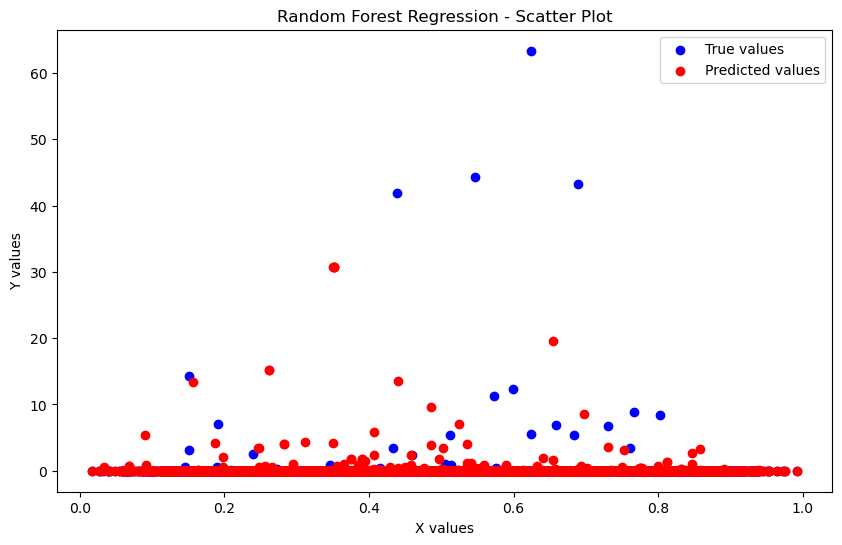

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='True values')
plt.scatter(x_test, y_pred, color='red', label='Predicted values')
plt.title('Random Forest Regression - Scatter Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

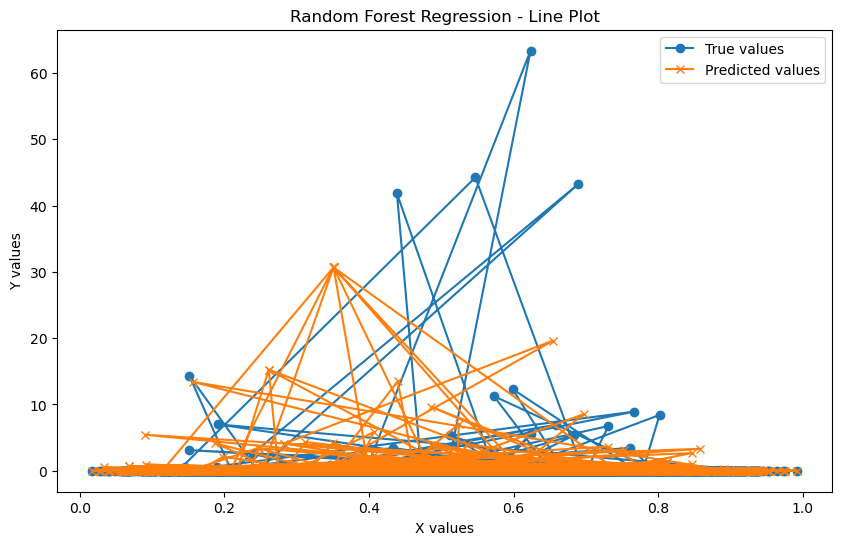

In [11]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True values', marker='o')
plt.plot(x_test, y_pred, label='Predicted values', marker='x')
plt.title('Random Forest Regression - Line Plot')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

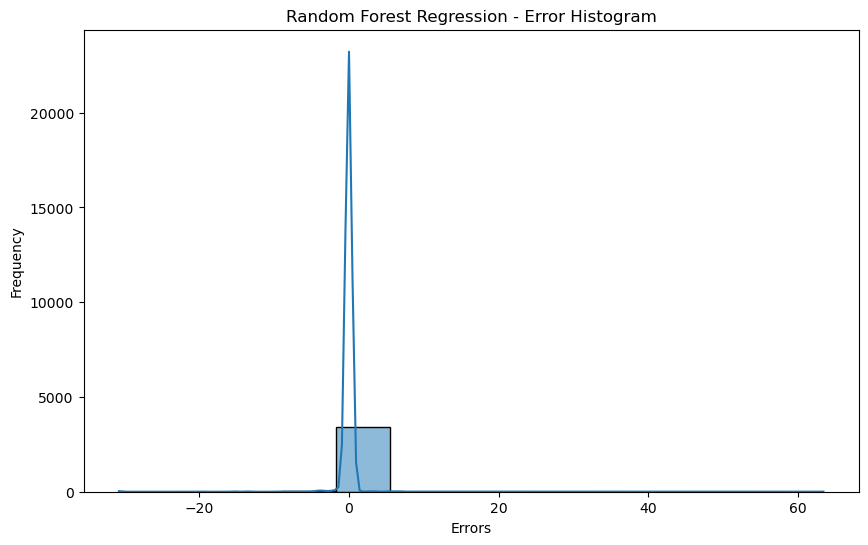

In [12]:
# Error histogram
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Random Forest Regression - Error Histogram')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.show()

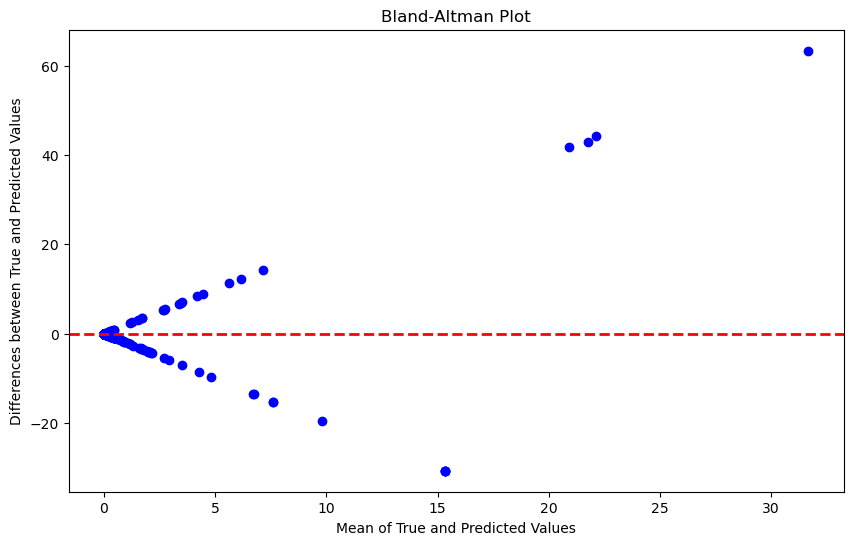

In [13]:
# Bland-Altman plot
plt.figure(figsize=(10, 6))
mean_values = (y_test + y_pred) / 2
differences = y_test - y_pred
plt.scatter(mean_values, differences, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Bland-Altman Plot')
plt.xlabel('Mean of True and Predicted Values')
plt.ylabel('Differences between True and Predicted Values')
plt.show()

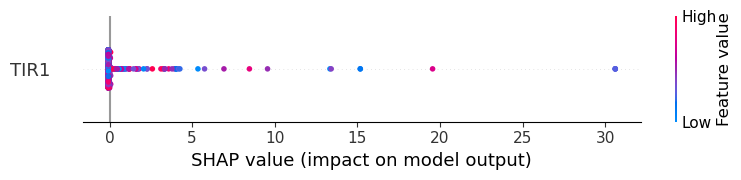

In [14]:
import shap

# Assuming x_values and y_values are your 1D arrays
# Replace these with your actual data
x_values = x_test  # Replace with your actual x data
y_values = y_test  # Replace with your actual y data

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the single feature
shap_values = explainer.shap_values(x_values)

# Summary plot for a single feature
shap.summary_plot(shap_values, x_values, feature_names=['TIR1'])
